In [70]:
import os
from skimage.io  import imread
from skimage.transform import resize
from PIL import Image
import numpy as np
import pandas as pd

In [45]:
input_dr="/content/drive/MyDrive/Cats_and_Dogs_Dataset"

In [46]:
catagories=["cat500","dog500"]
for catagory in catagories:
  for file in os.listdir(os.path.join(input_dr,catagory)):  # "/content/drive/MyDrive/cats__01/cat500"
    img_path=os.path.join(input_dr,catagory,file)
    print(img_path)

/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.103.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.100.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.10.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.1.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.136.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.133.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.130.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.132.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.129.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.128.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.13.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.127.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.124.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.123.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.125.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset

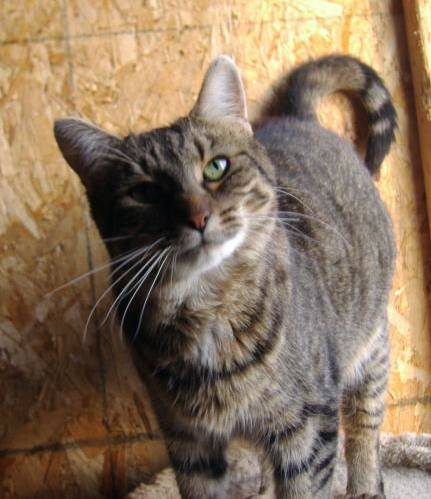

In [47]:
Image.open("/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.21.jpg")

In [48]:
image_path = "/content/drive/MyDrive/Cats_and_Dogs_Dataset/cat500/cat.21.jpg" # Assign the desired file path to a variable

img=imread(image_path)
print(img)

[[[187 147  95]
  [180 143  91]
  [176 138  89]
  ...
  [240 231 166]
  [248 245 178]
  [254 255 187]]

 [[185 145  93]
  [181 144  92]
  [180 142  93]
  ...
  [240 231 166]
  [247 244 177]
  [253 254 186]]

 [[185 145  93]
  [182 145  92]
  [183 146  94]
  ...
  [243 235 172]
  [247 243 179]
  [250 251 185]]

 ...

 [[ 62  33  17]
  [ 57  30  13]
  [ 55  26  10]
  ...
  [207 203 204]
  [197 195 196]
  [193 189 190]]

 [[ 63  34  16]
  [ 58  29  11]
  [ 54  25   7]
  ...
  [204 202 203]
  [198 196 197]
  [193 191 192]]

 [[ 64  35  17]
  [ 58  29  11]
  [ 54  25   7]
  ...
  [203 201 202]
  [199 197 198]
  [195 193 194]]]


In [49]:
img=resize(img,(15,15))
img=img.flatten()

In [50]:
data=[]
labels=[]



In [51]:
for category_idx, catagory in enumerate(catagories):
  for file in os.listdir(os.path.join(input_dr,catagory)):
    img_path=os.path.join(input_dr,catagory,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    img=img.flatten()
    data.append(img)
    labels.append(category_idx)



In [52]:
labels=np.asarray(labels)
data=np.asarray(data)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,shuffle=True, stratify=labels)


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred=lr.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.54

In [59]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
accuracy_score(y_test,y_pred)

0.55

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6

In [68]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(random_state=42)
param_grid={
    "n_estimators":[50,250],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
    }

CV_rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
CV_rf.fit(x_train,y_train)
CV_rf.best_params_
rf1=RandomForestClassifier(random_state=42,n_estimators=250,max_features='auto',max_depth=8,criterion='gini')
rf1.fit(x_train,y_train)
y_pred=rf1.predict(x_test)
print("Accuracy for Random Forest on Data",accuracy_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy for Random Forest on Data 0.65


In [71]:
pd.DataFrame({"Actual_value":y_test,"Predicted_values":y_pred})

,Actual_value,Predicted_values
0,1,1
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,1,1
98,1,1
